# Hello World

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify hand-written digits. The dataset we will use is the MNIST handwritten digit classification, a classic dataset in the deep learning community. You can think of "solving" MNIST as the "Hello World" of deep learning programs for computer vision.

Each image in the MNIST dataset is 28x28 and contains a centered, grayscale digit. We’ll flatten each 28x28 into a 784 dimensional vector, which we’ll use as input to our neural network. Our output will be one of 10 possible categories (0 to 9).

<img src="./resources/mnist-examples.png"  style="height: 315px"/>

Let's first install the packages we'll need. Note: we need to install TensorFlow because we're going to run Keras on a TensorFlow backend (i.e. TensorFlow will power Keras).

In [1]:
pip install keras tensorflow mnist

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.


## 1. Import packages and classes

We'll use tf.keras, a high-level API to build and train models in TensorFlow.

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


## 2. Import the MNIST dataset

The MNIST dataset is relatively small and is used to verify that an algorithm works as expected. 

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the MNIST directly from TensorFlow, just import and load the data.

In [4]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


## 3. Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels.

In [5]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set.

In [6]:
len(train_labels)

60000

Each label is an integer between 0 and 9.

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels. And the test set contains 10,000 image labels.

In [8]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


## 4. Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.

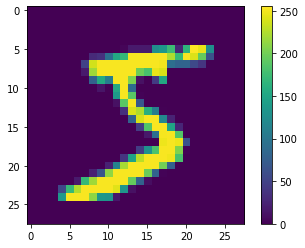

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We scale these values to a range of 0 to 1 before feeding to the neural network model. Normalized pixel values make our network easier to train. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way. 

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

We display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

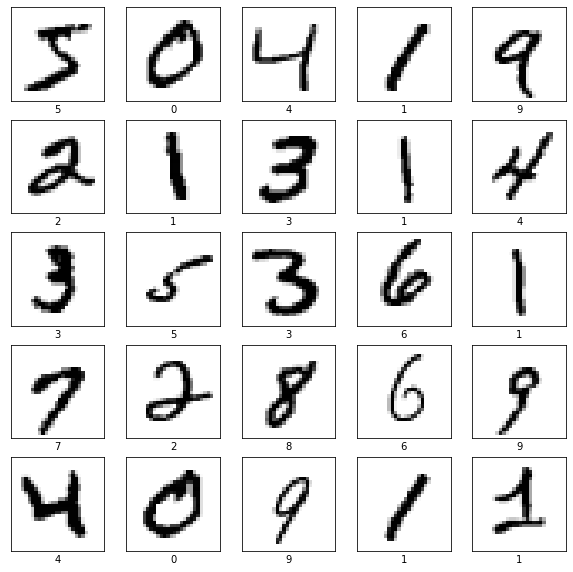

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## 5. Build the model

The basic building block of a neural network is a layer. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers.

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

- The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely-connected, or fully-connected, neural layers. 

- The second layer has 128 nodes (or neurons) and uses the ReLU activation function. We could explain this function but it would involve a lot of math. Just remember that ReLU is a variant of the sigmoid function.

- The third (and last) layer is a 10-node softmax layer (softmax turns arbitrary real values into probabilities). This layer returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image corresponds to the digit.

## 6. Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function — This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
- Optimizer — This is how the model is updated based on the data it sees and its loss function. We'll stick with a pretty good default: the Adam gradient-based optimizer.
- Metrics — Used to monitor the training and testing steps. Since this is a classification problem, we'll just have Keras report on the accuracy metric.

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 7. Train the model

Training a model in Keras literally consists only of calling `fit()` and specifying some parameters. There are a lot of possible parameters, but we'll only manually supply a few:

- The training data (images and labels), commonly known as X and y, respectively.
- The number of epochs (iterations over the entire dataset) to train for.

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 888us/step - loss: 0.2583 - accuracy: 0.9261
Epoch 2/5
1875/1875 [==============================] - 2s 886us/step - loss: 0.1122 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 2s 875us/step - loss: 0.0760 - accuracy: 0.9773
Epoch 4/5
1875/1875 [==============================] - 2s 874us/step - loss: 0.0575 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 2s 896us/step - loss: 0.0448 - accuracy: 0.9859


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.98 (or 98%) on the training data. This doesn’t tell us much, though - we may be overfitting. The real challenge will be seeing how our model performs on our test data.

## 8. Evaluate accuracy

Evaluating the model is pretty simple.

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 549us/step - loss: 0.0690 - accuracy: 0.9772
Test accuracy: 0.9771999716758728


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. __This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on its training data.__

Thus, our model achieves a 0.0817 test loss and 97.6% test accuracy (you might get slightly other values)! Not bad for your first neural network.

## 9. Make predictions

With the model trained, we can use it to make predictions about the test images.

In [16]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction.

In [17]:
predictions[0]

array([4.5338635e-07, 1.5555184e-08, 2.5094980e-05, 7.4863492e-05,
       1.9279531e-10, 1.4272341e-07, 1.7222900e-13, 9.9988019e-01,
       5.0278923e-06, 1.4303531e-05], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different digits. We can see which digit has the highest confidence value.

In [18]:
np.argmax(predictions[0])

7

So the model is most confident that this image is a seven. And we can check the image to see if this is correct.

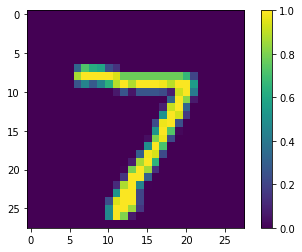

In [19]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Hooray! Well done!

## 10. Exercise

Draw the first 20 __test images__ (5 images in a row). Below the image you print the actual digit (a) and the predicted digit (p). If they are the same the textcolor is green, red otherwise. You should get something like this:

<img src="./resources/digits.png"/>

Since we achieved an accuracy of 97.6 % most of the labels should be green.

In [20]:
# solution code


## 11. Saving the Model

Now that we have a working, trained model, we’ll save it to disk so we can load it back up anytime.

In [ ]:
model.save_weights('resources/helloworldmodel.h5')

We can now reload the trained model whenever we want by rebuilding it and loading in the saved weights.

In [21]:
from tensorflow import keras

# build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# load the model's saved weights
model.load_weights('resources/helloworldmodel.h5')